# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true
- Display the first few rows to confirm it loaded correctly.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. Key Stakeholders:

Hotel Management (General Managers, Revenue Managers, Marketing Managers)
Hotel Owners/Investors
Sales and Reservations Teams
Customer Relationship Management (CRM) Team

2. Stakeholder Goals:

Hotel Management: Increase occupancy rates, optimize pricing strategies, reduce cancellations, improve guest satisfaction, understand market trends, and enhance operational efficiency.
Hotel Owners/Investors: Maximize profitability and return on investment (ROI), understand business performance, and identify growth opportunities.
Sales and Reservations Teams: Identify effective sales channels, understand customer booking behavior, and reduce booking errors.
CRM Team: Improve guest loyalty, personalize guest experiences, and understand customer segments.

3. Business Problem Statement: How can hotels effectively analyze booking data to identify key drivers of cancellations and optimize pricing and marketing strategies to minimize revenue loss and maximize profitability?




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks
- Flag any issues you notice (e.g., missing values, formatting problems)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal 

None


Data Description:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000



Null Values:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0



Number of Duplicate Rows:


np.int64(31994)

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. What structural issues or problems did you find?

Missing Values: Several columns have missing values, notably company (highly missing), agent, country, and children.
Duplicate Rows: A significant number of duplicate rows exist in the dataset.
Data Types: The children, agent, and company columns are floats but represent counts or IDs, which might be better suited as integers if no fractional values are expected.
Potential Outliers: The adr (Average Daily Rate) column has a maximum value that seems unusually high, suggesting potential outliers.
Irrelevant/Redundant Columns: Columns like arrival_date_week_number and arrival_date_day_of_month might be redundant if a full datetime column is created. agent and company have a large number of missing values and might not be useful for all analyses.

2. What actions would you recommend to clean or prepare this dataset for use?

Handle Missing Values:
For company and agent, consider dropping the columns due to the high number of missing values, or impute with a placeholder like 0 or "Unknown" if they are used categorically.
For country, impute missing values with the most frequent country or a placeholder.
For children, impute missing values with 0 or the median/mode if appropriate, or drop the few rows with missing values.
Remove Duplicate Rows: Drop duplicate rows to ensure unique observations for analysis.
Address Data Types: Convert children, agent, and company to integer type where appropriate after handling missing values.
Handle Outliers: Investigate and potentially handle outliers in the adr column using techniques like capping or removal if necessary.
Feature Engineering: Create a combined date column from the year, month, and day columns for easier time-series analysis.
Consider Column Relevance: Evaluate the relevance of columns like agent and company for specific analyses and decide whether to keep or drop them.



## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

Univariate Analysis of ADR:


,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


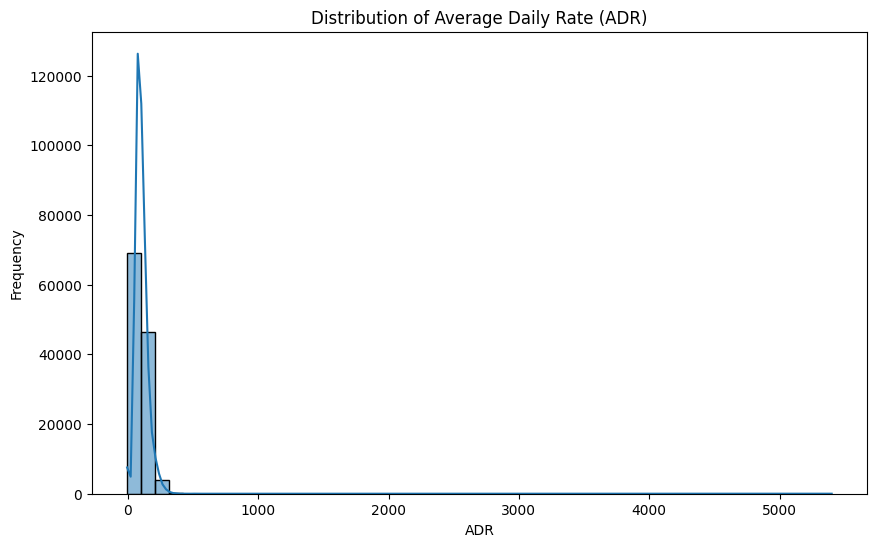


Univariate Analysis of Hotel Type:


,count
hotel,
City Hotel,79330
Resort Hotel,40060


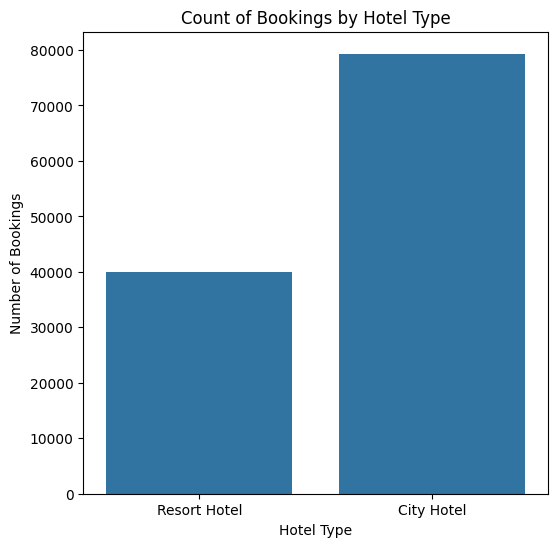


Univariate Analysis of Cancellations:


,count
is_canceled,
0,75166
1,44224


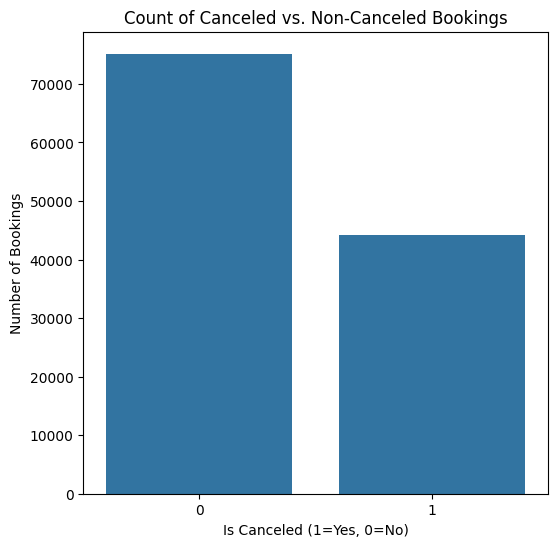

### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
- **Variable 1 – Summary and insights: ADR (Average Daily Rate): I explored the distribution of the Average Daily Rate (adr). I found that the majority of bookings have an ADR between approximately 50 and 150. There is a long tail on the right side of the distribution, indicating some bookings with very high ADR values, which could be outliers. The minimum value is negative, which is likely a data error.
- **Variable 2 – Summary and insights: Hotel Type: I explored the distribution of hotel types. I found that there are significantly more bookings for City Hotels than for Resort Hotels. This suggests that City Hotels represent a larger portion of the dataset and likely the hotel group's overall business.
- **Variable 3 – Summary and insights: Is Canceled: I explored the distribution of canceled versus non-canceled bookings. I found that a substantial portion of bookings are canceled (around 37%). This is a significant business issue that warrants further investigation to understand the drivers of cancellations.


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

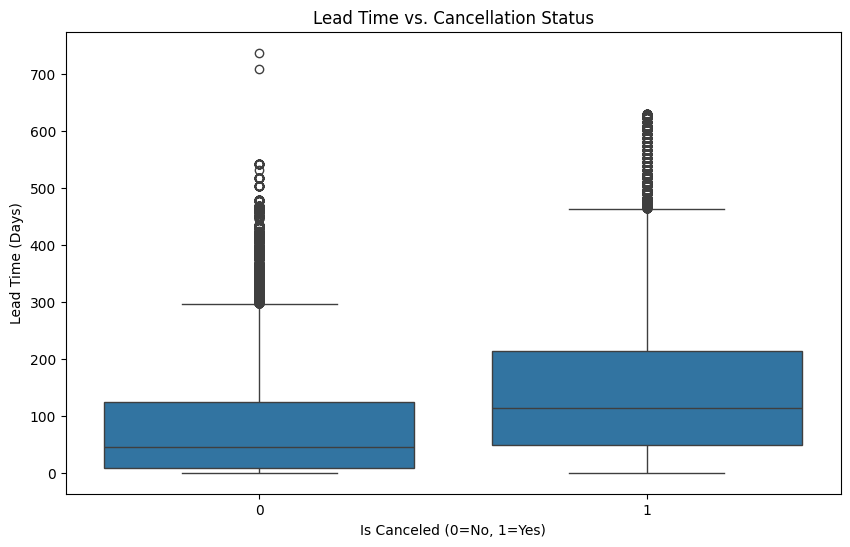

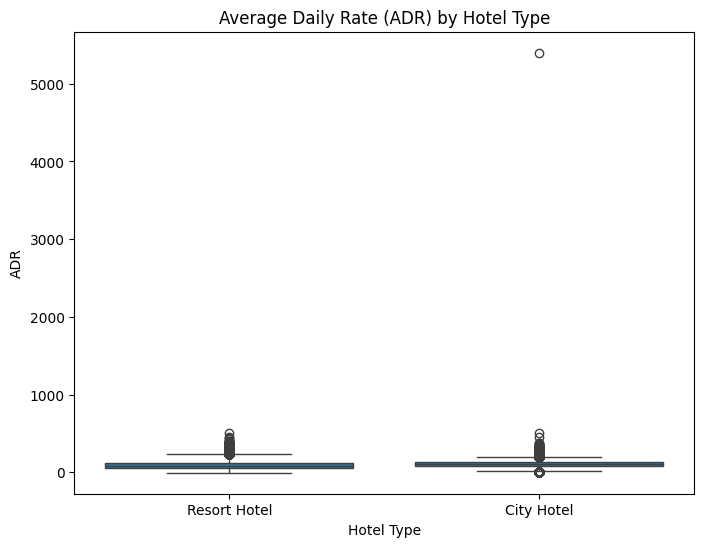

In [4]:
# Bivariate analysis of lead_time vs. is_canceled
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs. Cancellation Status')
plt.xlabel('Is Canceled (0=No, 1=Yes)')
plt.ylabel('Lead Time (Days)')
plt.show()

# Bivariate analysis of hotel type vs. adr
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- **Relationship 1: Lead Time vs. Cancellation Status: I analyzed the relationship between lead_time and is_canceled using a boxplot. I found that canceled bookings tend to have a significantly higher median lead time compared to non-canceled bookings. This suggests that bookings made further in advance are more likely to be canceled. This is a crucial insight for revenue management and marketing teams.
- **Relationship 2: Hotel Type vs. ADR: I analyzed the relationship between hotel type and adr using a boxplot. I found that City Hotels generally have a higher median ADR than Resort Hotels. This could be due to various factors like location, target customer base, or pricing strategies. This insight is important for understanding the revenue streams of each hotel type.


## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. The insight I will focus on is the relationship between lead time and cancellations: bookings made further in advance (higher lead time) are more likely to be canceled.
2. This problem primarily involves variability. Cancellation behavior is not uniform; it varies significantly based on factors like how far in advance a booking is made, the market segment, the distribution channel, and potentially other guest or booking characteristics. Understanding and predicting this variable behavior adds complexity. It also has volume due to the large number of bookings and cancellations.
3. Predictive Analytics would be most helpful here. Since we want to understand why cancellations happen (diagnostic) and potentially forecast which bookings are likely to be canceled, predictive models (like logistic regression, decision trees, or machine learning algorithms) can identify the key factors contributing to cancellations and assign a probability of cancellation to new bookings. This allows hotels to proactively target high-risk bookings with re-engagement strategies or flexible cancellation policies. While descriptive analytics helped identify the pattern, predictive analytics can provide actionable insights for reducing cancellations.



## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. High Cancellation Rate: A significant proportion of bookings are canceled (around 37%).
Lead Time and Cancellations: Bookings made with a longer lead time are more likely to be canceled.
Hotel Type and ADR: City Hotels generally have a higher Average Daily Rate compared to Resort Hotels.

2. Hotel Management & Owners/Investors: The high cancellation rate directly impacts revenue and profitability. Understanding the drivers (like lead time) is crucial for optimizing strategies to reduce cancellations and increase occupancy (Hotel Management goal) and maximize ROI (Owners/Investors goal).
Revenue Managers: The difference in ADR between hotel types is vital for revenue managers to set appropriate pricing strategies for each hotel and understand their respective revenue potential.
Marketing & Sales Teams: The insight about lead time and cancellations can inform marketing campaigns and sales strategies, potentially targeting early bookers with more flexible options or different communication to reduce cancellation risk.

3. Based on the strong relationship between lead time and cancellations, I recommend implementing a dynamic cancellation policy or targeted re-engagement strategy for bookings made with a long lead time. This could involve offering slightly more flexible cancellation terms for early bookings, sending personalized reminders closer to the arrival date, or offering small incentives to confirm their stay. This could help reduce the number of cancellations among this high-risk group.

4. This analysis directly relates to my learning outcome of "Applying data visualization and descriptive statistics to identify key business trends and communicate actionable insights to stakeholders." By using plots like boxplots and countplots, and summarizing key metrics (.describe(), .value_counts()), I was able to identify significant trends (high cancellation rate, lead time impact, ADR by hotel type). I then framed these findings in the context of stakeholder goals (revenue, profitability, occupancy) and made a specific, actionable recommendation (targeted cancellation strategy for long lead times), demonstrating the ability to translate data analysis into business insights.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [5]:
!jupyter nbconvert --to html "assignment_05_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook assignment_05_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 492526 bytes to assignment_05_ChristensenBryson.html
